# Can We Predict Churn Rate?: The Lifeline of Startups and Their Customers

## 1: EDA(Exploratory Data Analysis) 

### 1-1: Data Loading and Initial Inspection

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading and initial exploration of datasets
df_members = pd.read_csv('data/members_v3.csv')
df_train = pd.read_csv('data/train_v2.csv')
df_trans = pd.read_csv('data/transactions_v2.csv')
df_userlog = pd.read_csv('data/user_logs_v2.csv')

# Create a list of dataframes
dataframes = [df_members, df_train, df_trans, df_userlog]

### 1-2: Data Overview and Data Shape

In [3]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [4]:
df_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


df_members has 6,769,473 entries, and each entry has 6 attributes. The dataset contains 4 numerical columns and 2 categorical columns :
- msno: user id
- city: Numeric code representing the city of the member
- bd: This represents the member's age according to the data provider. However we may need to explore this further as this column has outlier values ranging from -7000 to 2015.
- gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d, taken as a snapshot at which the member.csv is extracted. Not representing the actual churn behavior.

In [5]:
# Check for duplicates in this data frame
duplicates = df_members[df_members.duplicated()]

if duplicates.empty:
    print("No duplicates found in df_members.")
else:
    print("Duplicates found in df_members:")
    print(duplicates)

No duplicates found in df_members.


In [6]:
df_train.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      970960 non-null  object
 1   is_churn  970960 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


df_train has 970,960 entries, and each entry has 2 attributes:
- msno: user id
- is_churn: churn status

In [8]:
# Check for duplicates in this data frame
duplicates = df_train[df_train.duplicated()]

if duplicates.empty:
    print("No duplicates found in df_train.")
else:
    print("Duplicates found in df_train:")
    print(duplicates)

No duplicates found in df_train.


In [9]:
df_trans.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [10]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   msno                    1431009 non-null  object
 1   payment_method_id       1431009 non-null  int64 
 2   payment_plan_days       1431009 non-null  int64 
 3   plan_list_price         1431009 non-null  int64 
 4   actual_amount_paid      1431009 non-null  int64 
 5   is_auto_renew           1431009 non-null  int64 
 6   transaction_date        1431009 non-null  int64 
 7   membership_expire_date  1431009 non-null  int64 
 8   is_cancel               1431009 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 98.3+ MB


df_trans has 1,431,009 entries, and each entry has 9 attributes:
- msno: user id
- payment_method_id: payment method
- payment_plan_days: length of membership plan in days
- plan_list_price: in New Taiwan Dollar (NTD)
- actual_amount_paid: in New Taiwan Dollar (NTD)
- is_auto_renew
- transaction_date: format %Y%m%d
- membership_expire_date: format %Y%m%d
- is_cancel: whether or not the user canceled the membership in this transaction.

In [11]:
# Check for duplicates in this data frame
duplicates = df_trans[df_trans.duplicated()]

if duplicates.empty:
    print("No duplicates found in df_trans.")
else:
    print("Duplicates found in df_trans:")
    print(duplicates)

No duplicates found in df_trans.


In [12]:
df_userlog.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [13]:
df_userlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   msno        object 
 1   date        int64  
 2   num_25      int64  
 3   num_50      int64  
 4   num_75      int64  
 5   num_985     int64  
 6   num_100     int64  
 7   num_unq     int64  
 8   total_secs  float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.2+ GB


df_userlog has 18,396,362 entries, and each entry has 9 attributes:
- msno: user id
- date: format %Y%m%d
- num_25: # of songs played less than 25% of the song length
- num_50: # of songs played between 25% to 50% of the song length
- num_75: # of songs played between 50% to 75% of of the song length
- num_985: # of songs played between 75% to 98.5% of the song length
- num_100: # of songs played over 98.5% of the song length
- num_unq: # of unique songs played
- total_secs: total seconds played


In [14]:
# Check for duplicates in this data frame
duplicates = df_userlog[df_userlog.duplicated()]

if duplicates.empty:
    print("No duplicates found in df_userlog.")
else:
    print("Duplicates found in df_userlog:")
    print(duplicates)

No duplicates found in df_userlog.


We move on to the next steps of the EDA, which include checking for missing values, understanding the distribution of values, and identifying any outliers or unusual data. First, let's check for missing values.

### 1-3: Missing Values and Duplication

In [15]:
# Check for missing values
df_members.isnull().sum()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

It seems like there are quite a number of missing values in the "gender" column. The rest of the columns do not have missing values.

In [16]:
df_train.isnull().sum()

msno        0
is_churn    0
dtype: int64

No missing values identified for this dataframe.

In [17]:
df_trans.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

No missing values identified for this dataframe.

In [18]:
df_userlog.isnull().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

No missing values identified for this dataframe.

### 1-4: Data Statistics and Visualization

#### df_members

First, we check summary statistics for numerical columns and count values for categorical columns. 

In [19]:
# Summary statistics for numerical columns
df_members.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [20]:
# Rounding the summary statistics to two decimal
df_members_rounded = df_members.describe().round(2)

# Displaying the describe() output
print(df_members_rounded)

             city          bd  registered_via  registration_init_time
count  6769473.00  6769473.00      6769473.00              6769473.00
mean         3.85        9.80            5.25             20145175.91
std          5.48       17.93            2.36                23186.01
min          1.00    -7168.00           -1.00             20040326.00
25%          1.00        0.00            4.00             20140422.00
50%          1.00        0.00            4.00             20151010.00
75%          4.00       21.00            7.00             20160604.00
max         22.00     2016.00           19.00             20170429.00


city:  
This column ranges from 1 to 22. The numbers in quartiles suggest that the majority of users are from a few specific cities (mostly city 1 and 4).

bd(Age):  
The minimum value of -7168 and the maximum value of 2016 are clearly errors, and we will address them later.

registered_via:  
This column ranges from -1 to 19, again with some strange negative values that might be errors.

registration_init_time:  
This column ranges from 20040303 to 20170403, covering a span of 13 years. The mean registration suggest that most users registered after this date.

In [21]:
# Value counts for categorical columns
gender_counts = df_members['gender'].value_counts()
print(gender_counts)

male      1195355
female    1144613
Name: gender, dtype: int64


Note that we have a significant number of null-values, and we will address this issue later.

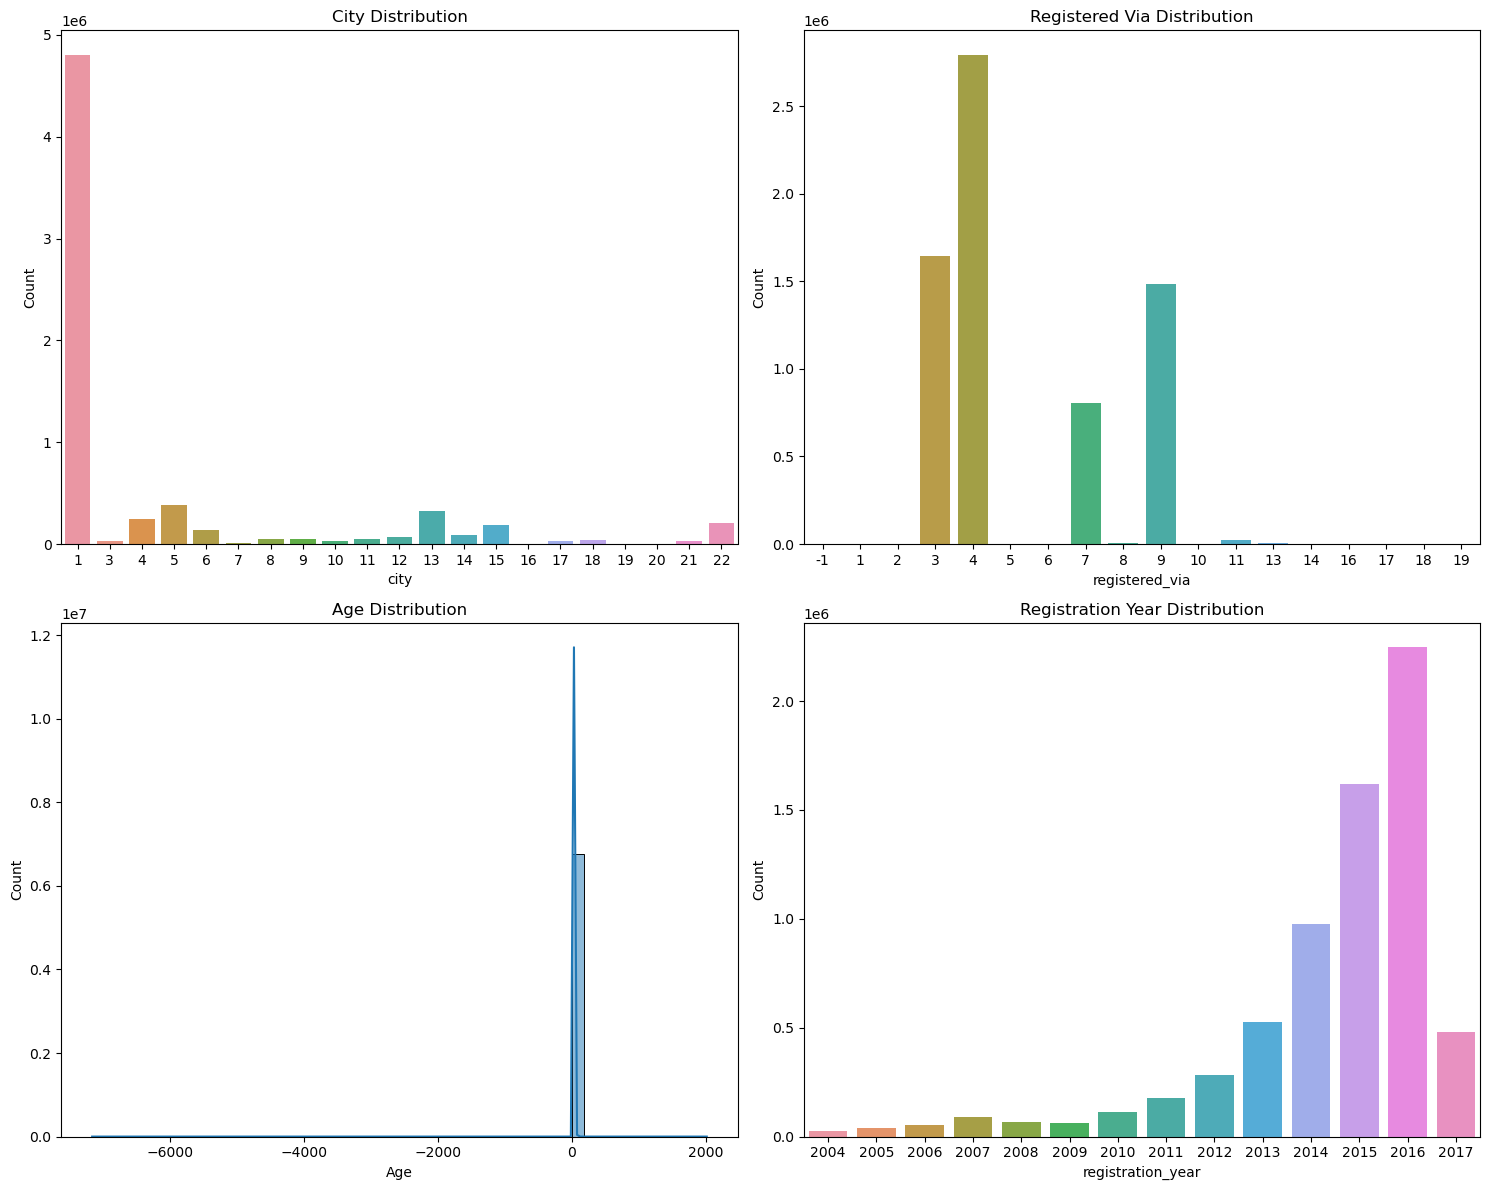

In [22]:
# Visualize the distribution of categorical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Distribution of city
sns.countplot(data=df_members, x='city', ax=axes[0, 0])
axes[0, 0].set_title('City Distribution')
axes[0, 0].set_ylabel('Count')

# Distribution of registered_via
sns.countplot(data=df_members, x='registered_via', ax=axes[0, 1])
axes[0, 1].set_title('Registered Via Distribution')
axes[0, 1].set_ylabel('Count')

# Distribution of bd (Age)
sns.histplot(df_members['bd'], bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')

# Distribution of registration_init_time
df_members['registration_year'] = pd.to_datetime(df_members['registration_init_time'], format='%Y%m%d').dt.year
sns.countplot(data=df_members, x='registration_year', ax=axes[1, 1])
axes[1, 1].set_title('Registration Year Distribution')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

- City Distribution:
    City with ID 1 is the most common. There is significant variation in the appearance rate of other city IDs. Considering the     overwhelming majority of city ID 1, it might be worthwhile to consolidate cities with lower appearance rates into a single category.

- Registered Via Distribution:
    Registration method 4 is the most common, followed by 3, 9, and 7. Depending on frequencies, it might be worth considering merging other data excluding these.

- Age Distribution:
    Ages are concentrated mainly between 25 to 35, with a peak around 29. This suggests that missing or inaccurate data might have been supplemented with the average age. There are also outliers (very high ages) present.

- Registration Year Distribution:
    Many users registered in 2016 and 2017.

#### df_train

First, we check summary statistics. 

In [23]:
# Summary statistics for numerical columns
df_train.describe()

,is_churn
count,970960.000000
mean,0.089942
std,0.286099
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


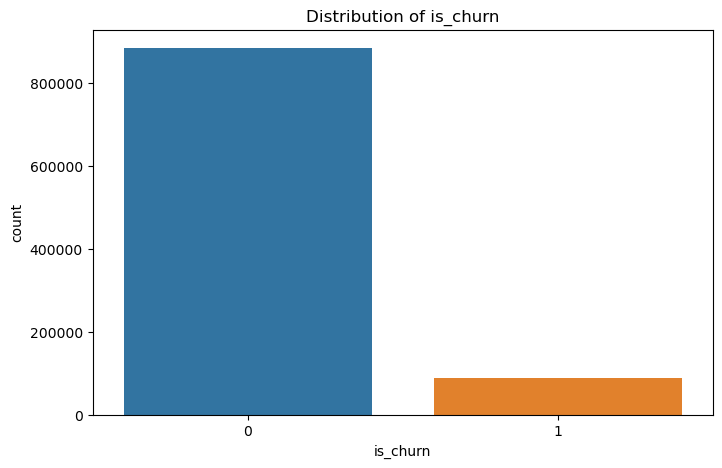

In [24]:
# Visualize the distribution of the target variable (is_churn)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='is_churn')
plt.title('Distribution of is_churn')
plt.show()

The df_train dataset contains the churn status, represented by the "is_churn" column, for each user ID. This column is our target variable for analysis.  

According to the summary statistics, it is evident that the majority of users have not churned (0), while a smaller proportion of users have churned (1).

#### df_trans

First, let's examine the summary statistics for the numerical columns in this dataset. It is worth noting that all columns, except for the ID column, are of numerical data type.

In [25]:
# Summary statistics for numerical columns
df_trans.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06
mean,3.791835e+01,6.601770e+01,2.817870e+02,2.813172e+02,7.853025e-01,2.016848e+07,2.017110e+07,2.455121e-02
std,4.964805e+00,1.024864e+02,4.351861e+02,4.354200e+02,4.106124e-01,4.858797e+03,3.032367e+03,1.547529e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,2.016042e+07,0.000000e+00
25%,3.600000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.017023e+07,2.017041e+07,0.000000e+00
50%,4.000000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.017031e+07,2.017042e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.017032e+07,2.017050e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.036102e+07,1.000000e+00


In [26]:
# Rounding the summary statistics to two decimal
df_trans_rounded = df_trans.describe().round(2)

# Displaying the describe() output
print(df_trans_rounded)

       payment_method_id  payment_plan_days  plan_list_price  \
count         1431009.00         1431009.00       1431009.00   
mean               37.92              66.02           281.79   
std                 4.96             102.49           435.19   
min                 2.00               0.00             0.00   
25%                36.00              30.00            99.00   
50%                40.00              30.00           149.00   
75%                41.00              30.00           149.00   
max                41.00             450.00          2000.00   

       actual_amount_paid  is_auto_renew  transaction_date  \
count          1431009.00     1431009.00        1431009.00   
mean               281.32           0.79       20168484.54   
std                435.42           0.41           4858.80   
min                  0.00           0.00       20150101.00   
25%                 99.00           1.00       20170228.00   
50%                149.00           1.00       2017

payment_plan_days:  
The minimum value of 0.00 for the payment plan days seems unusual and may need a closer look.

plan_list_price and actual_amount_paid:  
Both these columns have a minimum value of 0.00, which could indicate free subscriptions or missing data.

transaction_date and membership_expire_date:  
All values for these columns appear to be within reasonable ranges, but the maximum value for membership_expire_date (20361015.00) is unrealistic, suggesting a possible outlier or data entry error.

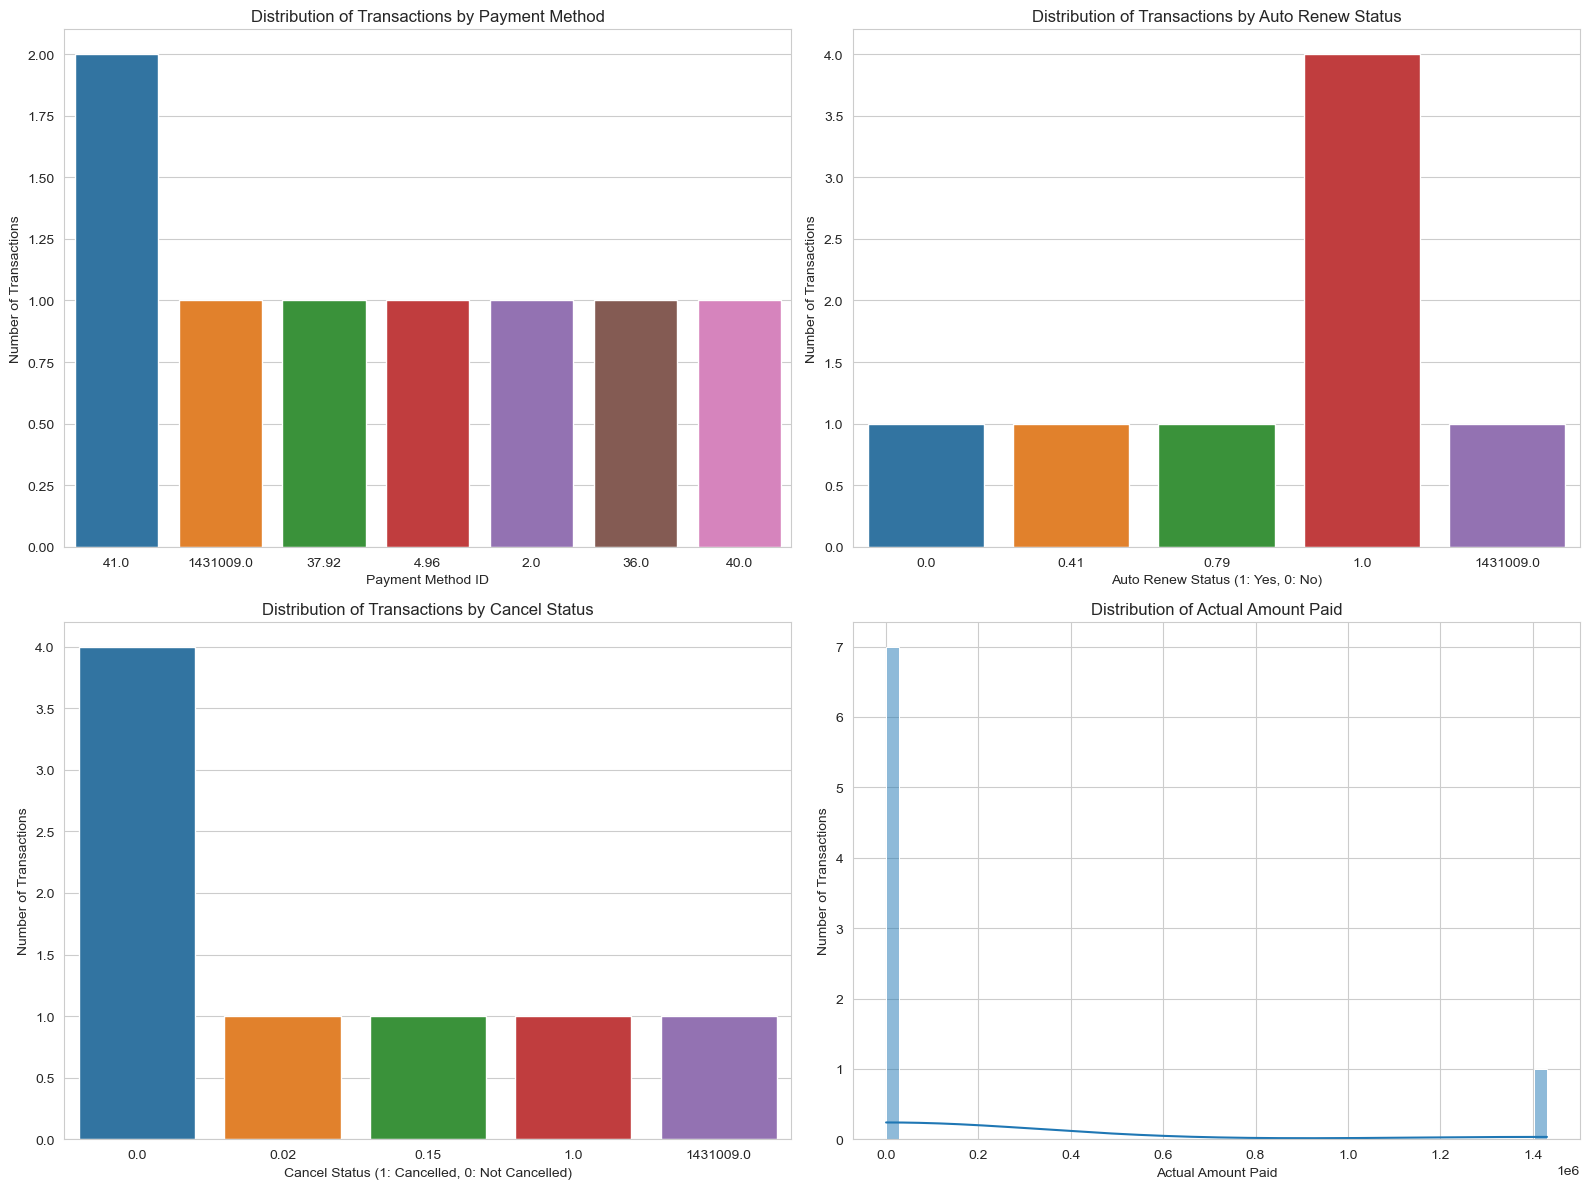

In [27]:
# Set the style of seaborn
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# 1. Payment Method Distribution
sns.countplot(data=df_trans_rounded, x='payment_method_id', order=df_trans_rounded['payment_method_id'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Transactions by Payment Method')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].set_xlabel('Payment Method ID')

# 2. Auto Renew Distribution
sns.countplot(data=df_trans_rounded, x='is_auto_renew', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Transactions by Auto Renew Status')
axes[0, 1].set_ylabel('Number of Transactions')
axes[0, 1].set_xlabel('Auto Renew Status (1: Yes, 0: No)')

# 3. Cancel Distribution
sns.countplot(data=df_trans_rounded, x='is_cancel', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Transactions by Cancel Status')
axes[1, 0].set_ylabel('Number of Transactions')
axes[1, 0].set_xlabel('Cancel Status (1: Cancelled, 0: Not Cancelled)')

# 4. Actual Amount Paid Distribution
sns.histplot(data=df_trans_rounded, x='actual_amount_paid', bins=50, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Actual Amount Paid')
axes[1, 1].set_ylabel('Number of Transactions')
axes[1, 1].set_xlabel('Actual Amount Paid')

plt.tight_layout()
plt.show()


- Distribution of Payment Methods:
    payment_method_id 41 is the most frequently used for transactions. Other payment methods account for a relatively smaller number of transactions.

- Distribution of Transactions by Auto-Renewal Status:
    The majority of users have activated the auto-renewal feature. 
    
- Distribution of Transactions by Cancellation Status: There are very few transactions that were cancelled.

- Distribution of the Actual Amount Paid: There is a peak in the lower range of amounts, indicating a concentration of transactions at specific amounts. In particular, transactions of amounts less than 100 are quite prevalent.

#### df_userlog

We check summary statistics for numerical columns and count values for categorical columns. 

In [28]:
# Summary statistics for numerical columns
df_userlog.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07
mean,2.017032e+07,6.191401e+00,1.508789e+00,9.413759e-01,1.079905e+00,3.028246e+01,2.903615e+01,7.904814e+03
std,8.916720e+00,1.342827e+01,3.908539e+00,1.924840e+00,3.518409e+00,4.203641e+01,3.219866e+01,1.013632e+04
min,2.017030e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,2.017031e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.959944e+03
50%,2.017032e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.800000e+01,4.582990e+03
75%,2.017032e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.700000e+01,3.800000e+01,9.848441e+03
max,2.017033e+07,5.639000e+03,9.120000e+02,5.080000e+02,1.561000e+03,4.110700e+04,4.925000e+03,9.194059e+06


In [29]:
# Rounding the summary statistics to two decimal
df_userlog_rounded = df_userlog.describe().round(2)

# Displaying the describe() output
print(df_userlog_rounded)

              date       num_25       num_50       num_75      num_985  \
count  18396362.00  18396362.00  18396362.00  18396362.00  18396362.00   
mean   20170316.09         6.19         1.51         0.94         1.08   
std           8.92        13.43         3.91         1.92         3.52   
min    20170301.00         0.00         0.00         0.00         0.00   
25%    20170308.00         0.00         0.00         0.00         0.00   
50%    20170316.00         2.00         1.00         0.00         0.00   
75%    20170324.00         7.00         2.00         1.00         1.00   
max    20170331.00      5639.00       912.00       508.00      1561.00   

           num_100      num_unq   total_secs  
count  18396362.00  18396362.00  18396362.00  
mean         30.28        29.04      7904.81  
std          42.04        32.20     10136.32  
min           0.00         1.00         0.00  
25%           7.00         8.00      1959.94  
50%          17.00        18.00      4582.99  
75% 

date:  
The specified minimum (20170301) and maximum (20170331) values suggest that the date data is correctly formatted.

num_25, num_50, num_75, num_985, num_100, num_unq, and total_secs:  
While the minimum values being 0 are reasonable and likely not errors, it is essential to investigate the maximum values to ensure they fall within a sensible range. 

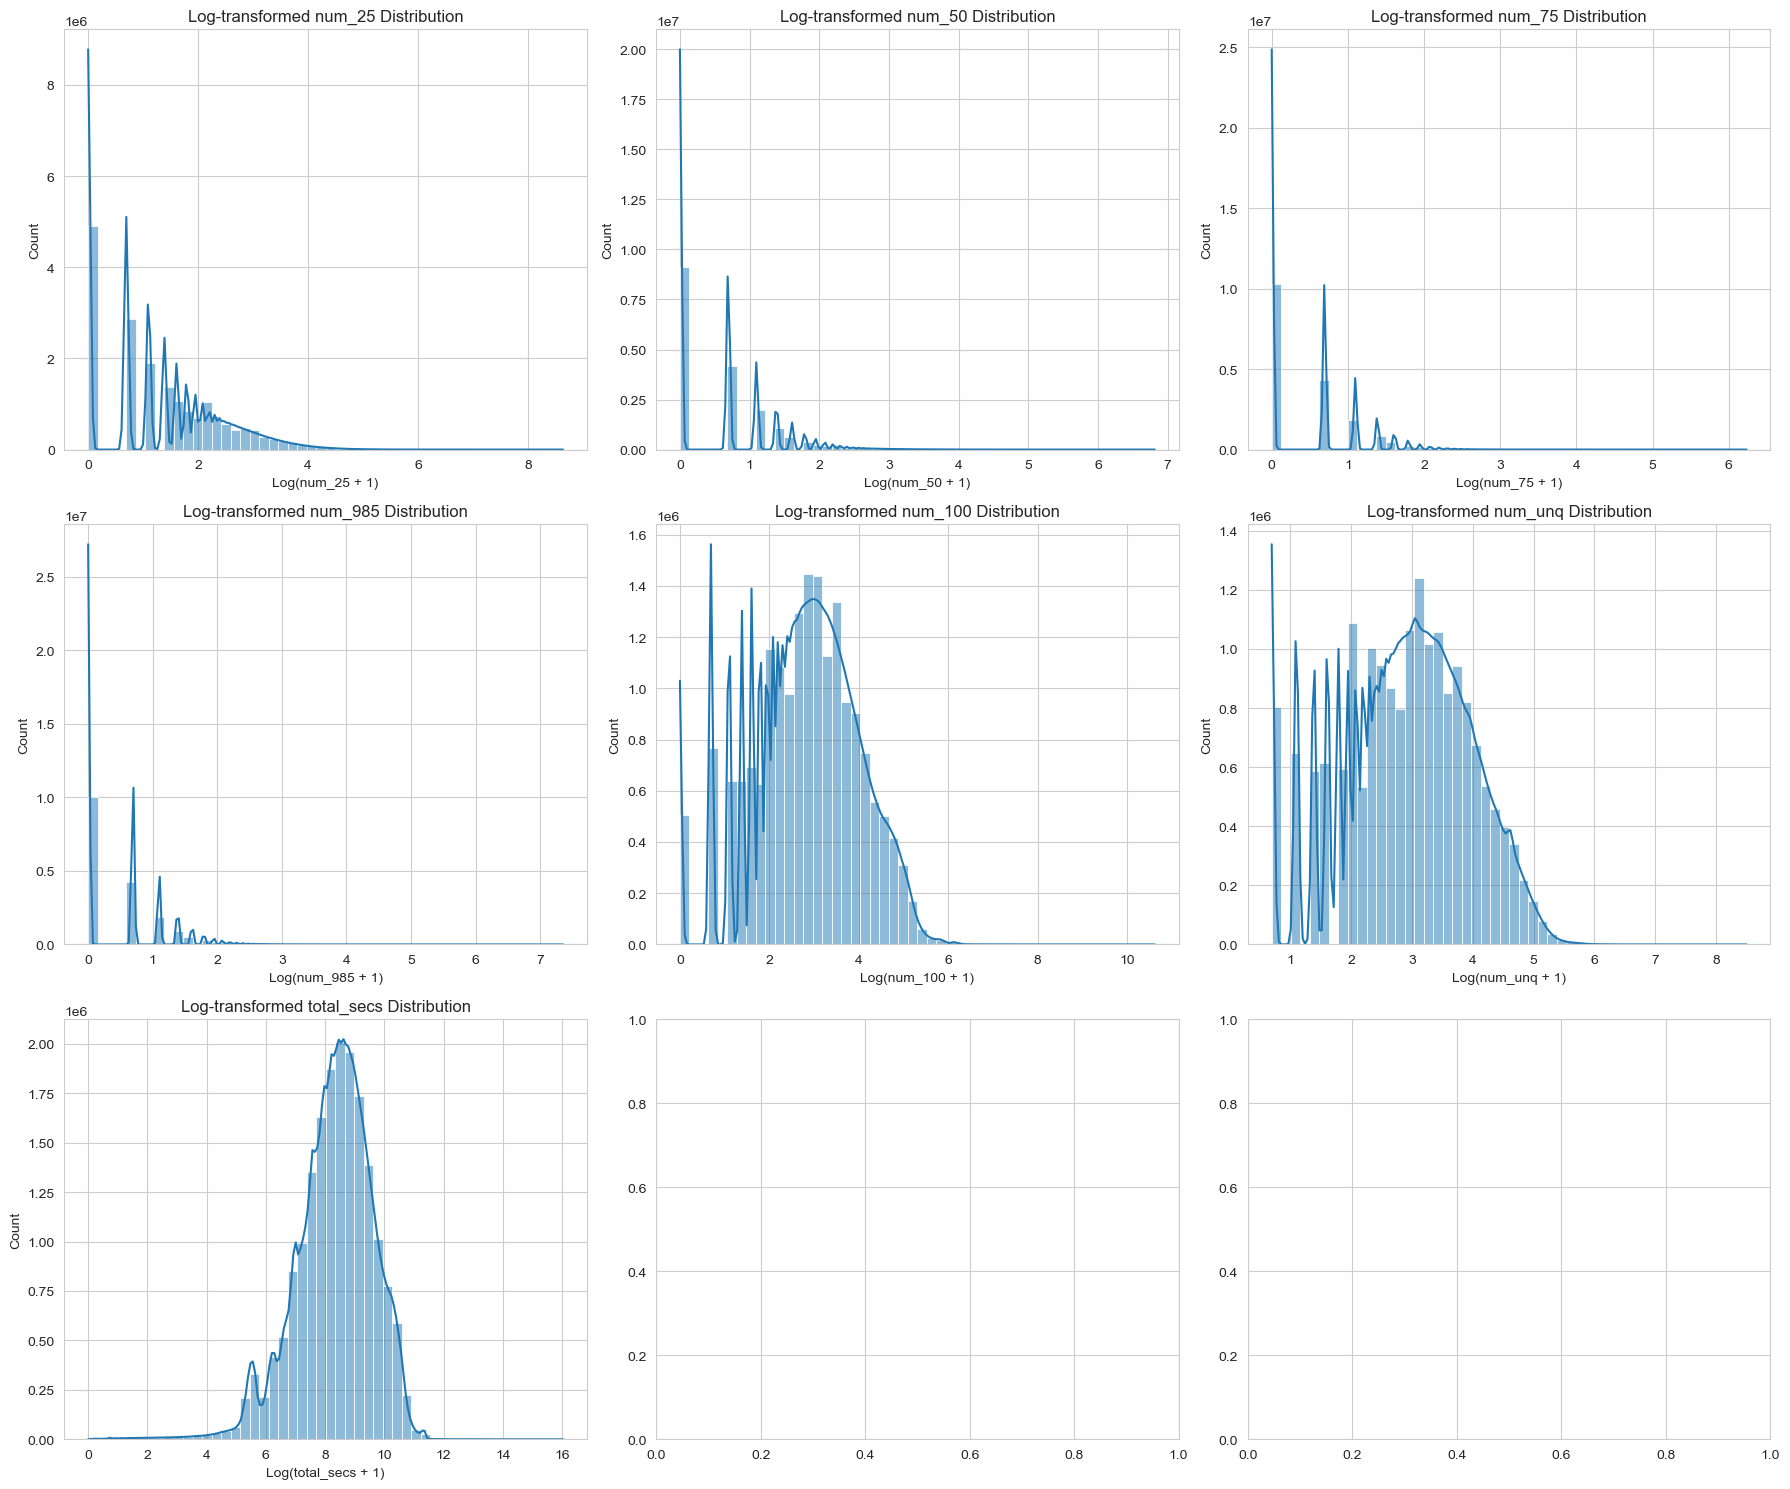

In [30]:
# Define the columns to visualize
all_columns = ['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs']

# Apply the log transformation (adding a small constant to handle zeros)
df_userlog_log = df_userlog[all_columns].apply(lambda x: np.log(x + 1))

# Create a new 3x3 subplot for all the columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Plotting the distributions for all columns in the 3x3 subplot after log transformation
for i, column in enumerate(all_columns):
    sns.histplot(df_userlog_log[column], bins=50, ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Log-transformed {column} Distribution')
    axes[i//3, i%3].set_ylabel('Count')
    axes[i//3, i%3].set_xlabel(f'Log({column} + 1)')

plt.tight_layout()
plt.show()

- num_25, num_50, num_75, num_985, num_100: These columns represent the count of songs played up to a certain percentage. After log transformation, we observe a right-skewed distribution for most of these columns. This suggests that many users play a small number of songs up to a specific percentage. Notably, the num_100 column indicates that many users listen to songs in their entirety.

- num_unq: This column represents the number of unique songs played. The distribution, after log transformation, is also right-skewed, suggesting that many users play a limited number of unique songs.

- total_secs: This column represents the total playback time in seconds. After the log transformation, its distribution is relatively uniform but with a slight right skew. This implies that many users tend to play a lot of songs in a short time.



### 1-5: Data Dictionary

In [31]:
# Combine the four datasets to create one data dictionary
combined_data_dict_entries = []

for dataset_name, dataset in zip(['df_members', 'df_train', 'df_trans', 'df_userlog'], dataframes):
    for col in dataset.columns:
        combined_data_dict_entries.append({
            "Dataset": dataset_name,
            "Column Name": col,
            "Data Type": dataset[col].dtype,
        })

# Convert the data dictionary into DataFrame format
combined_data_dictionary_new = pd.DataFrame(combined_data_dict_entries)


In [32]:
# Map descriptions for each dataset
descriptions = {
    "df_members": {
        "msno": "user id",
        "city": "Numeric code representing the city of the member",
        "bd": "This represents the member's age according to the data provider. However, we may need to explore this further as this column has outlier values ranging from -7000 to 2015.",
        "gender": "gender",
        "registered_via": "registration method",
        "registration_init_time": "format %Y%m%d",
        "expiration_date": "format %Y%m%d, taken as a snapshot at which the member.csv is extracted. Not representing the actual churn behavior."
    },
    "df_trans": {
        "msno": "user id",
        "payment_method_id": "payment method",
        "payment_plan_days": "length of membership plan in days",
        "plan_list_price": "in New Taiwan Dollar (NTD)",
        "actual_amount_paid": "in New Taiwan Dollar (NTD)",
        "is_auto_renew": "whether user set auto renew plan",
        "transaction_date": "format %Y%m%d",
        "membership_expire_date": "format %Y%m%d",
        "is_cancel": "whether or not the user canceled the membership in this transaction."
    },
    "df_userlog": {
        "msno": "user id",
        "date": "format %Y%m%d",
        "num_25": "# of songs played less than 25% of the song length",
        "num_50": "# of songs played between 25% to 50% of the song length",
        "num_75": "# of songs played between 50% to 75% of of the song length",
        "num_985": "# of songs played between 75% to 98.5% of the song length",
        "num_100": "# of songs played over 98.5% of the song length",
        "num_unq": "# of unique songs played",
        "total_secs": "total seconds played"
    }
}

# Update the Description column
for idx, row in combined_data_dictionary_new.iterrows():
    dataset_name = row['Dataset']
    col_name = row['Column Name']
    if dataset_name in descriptions and col_name in descriptions[dataset_name]:
        combined_data_dictionary_new.at[idx, 'Description'] = descriptions[dataset_name][col_name]

combined_data_dictionary_new


,Dataset,Column Name,Data Type,Description
0,df_members,msno,object,user id
1,df_members,city,int64,Numeric code representing the city of the member
2,df_members,bd,int64,This represents the member's age according to ...
3,df_members,gender,object,gender
4,df_members,registered_via,int64,registration method
5,df_members,registration_init_time,int64,format %Y%m%d
6,df_members,registration_year,int64,NaN
7,df_train,msno,object,NaN
8,df_train,is_churn,int64,NaN
9,df_trans,msno,object,user id


In [33]:
# merging members data with train data
df_train_mem = pd.merge(df_train, df_members, on='msno', how='left')
# merging transactions data with train members data
df_train_mem_trans = pd.merge(df_train_mem, df_trans, on='msno', how='left')
# merging user logs data with train members transaction data
df_train_merged = pd.merge(df_train_mem_trans, df_userlog, on='msno', how='left')

df_train_merged.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,registration_year,payment_method_id,payment_plan_days,...,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,2013.0,NaN,NaN,...,NaN,NaN,20170305.0,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,2013.0,NaN,NaN,...,NaN,NaN,20170301.0,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,2013.0,NaN,NaN,...,NaN,NaN,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,2013.0,NaN,NaN,...,NaN,NaN,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,2013.0,NaN,NaN,...,NaN,NaN,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


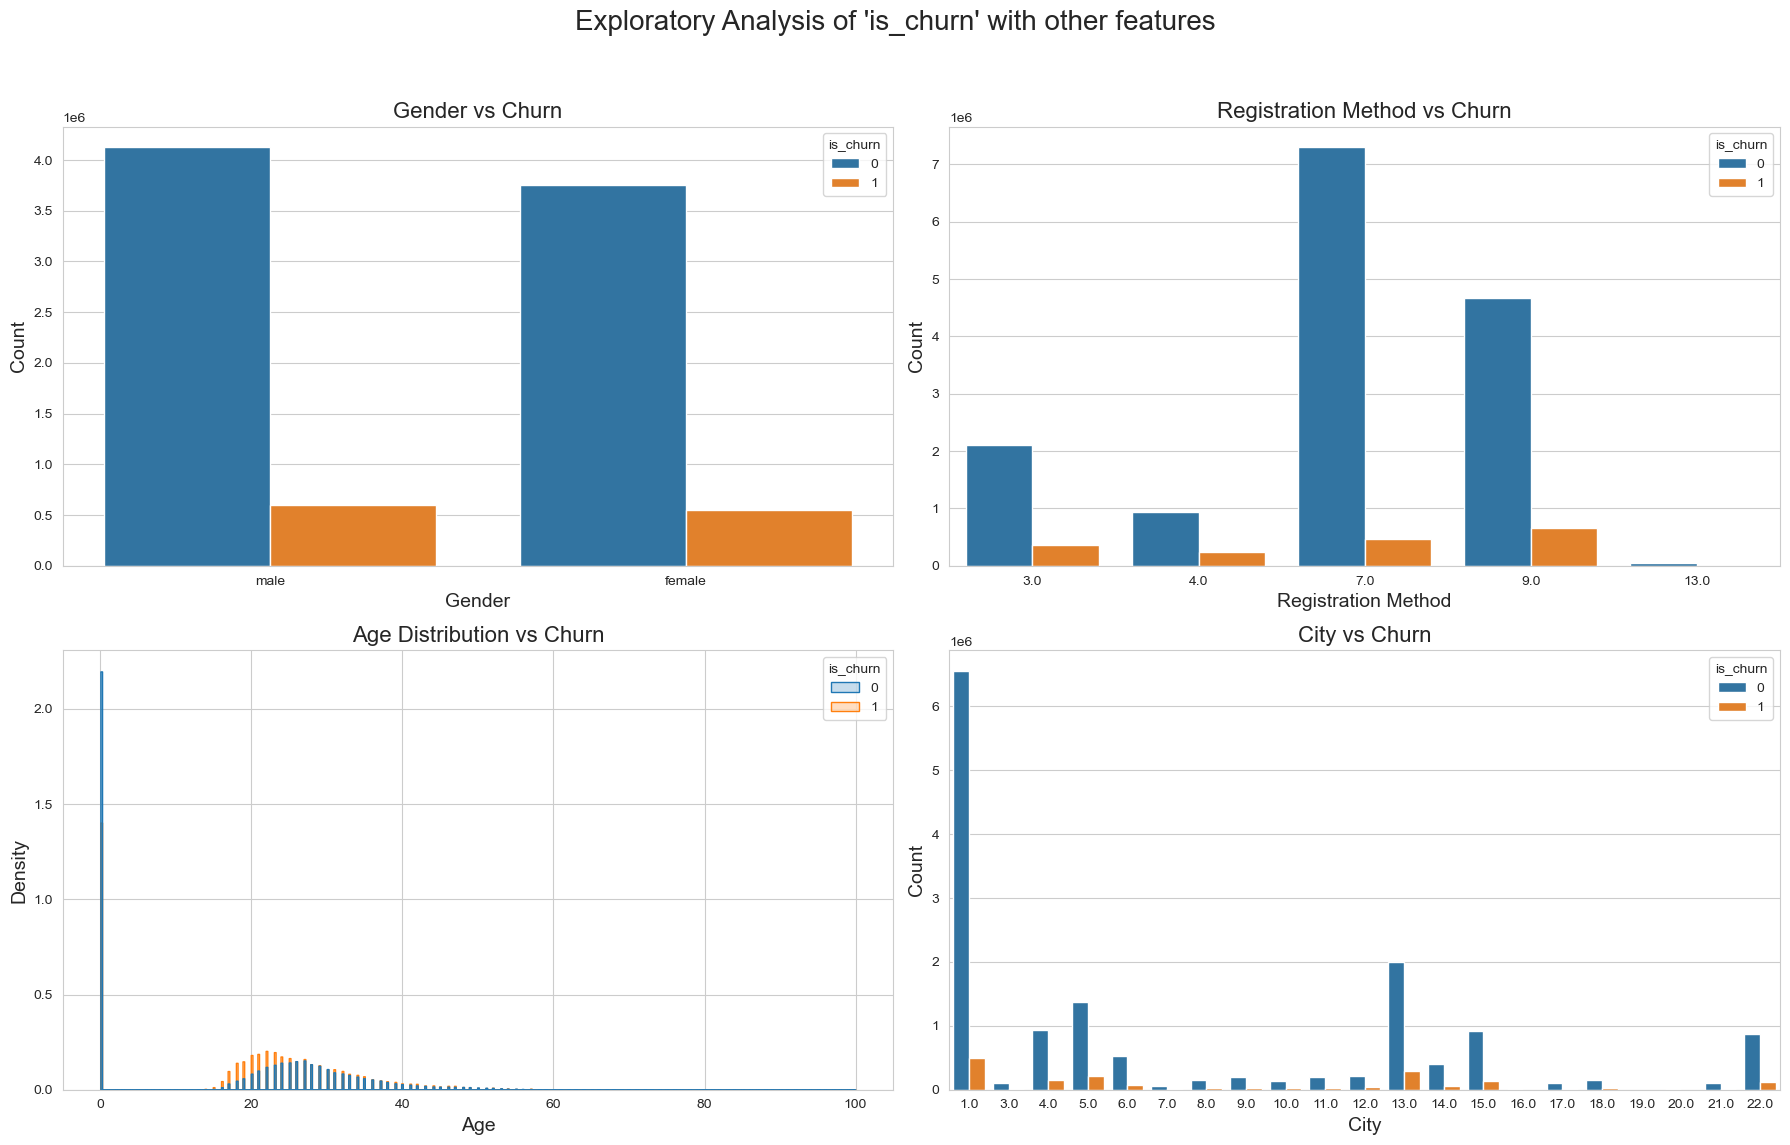

In [34]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Exploratory Analysis of 'is_churn' with other features", fontsize=20)

# Gender vs is_churn
sns.countplot(data=df_train_merged, x='gender', hue='is_churn', ax=axes[0, 0])
axes[0, 0].set_title("Gender vs Churn", fontsize=16)
axes[0, 0].set_xlabel("Gender", fontsize=14)
axes[0, 0].set_ylabel("Count", fontsize=14)

# Registered_via vs is_churn
sns.countplot(data=df_train_merged, x='registered_via', hue='is_churn', ax=axes[0, 1])
axes[0, 1].set_title("Registration Method vs Churn", fontsize=16)
axes[0, 1].set_xlabel("Registration Method", fontsize=14)
axes[0, 1].set_ylabel("Count", fontsize=14)

# Age distribution vs is_churn
sns.histplot(data=df_train_merged[df_train_merged['bd'].between(0, 100)], x='bd', hue='is_churn', element="step", stat="density", common_norm=False, ax=axes[1, 0])
axes[1, 0].set_title("Age Distribution vs Churn", fontsize=16)
axes[1, 0].set_xlabel("Age", fontsize=14)
axes[1, 0].set_ylabel("Density", fontsize=14)

# City vs is_churn
sns.countplot(data=df_train_merged, x='city', hue='is_churn', ax=axes[1, 1])
axes[1, 1].set_title("City vs Churn", fontsize=16)
axes[1, 1].set_xlabel("City", fontsize=14)
axes[1, 1].set_ylabel("Count", fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- Gender vs Churn:
    Among male, female, and users with undisclosed gender, there isn't a significant difference in the proportion of churned users. However, it's notable that users with undisclosed gender have a notably higher number of churned users.

- Registration Method vs Churn:
    When looking at churn based on registration methods, it's evident that there is a higher proportion of churned users associated with specific registration methods. For instance, in the case of registered_via being 3, there is a notably high number of churned users.

- Age Distribution vs Churn:
    Analyzing the distribution of age, it's apparent that there is a slightly higher proportion of churned users among younger users (from teens to early 30s). As age increases, the proportion of churned users seems to decrease.

- City vs Churn:
    Certain cities have a higher proportion of churned users. For example, cities like City 1 and City 4 exhibit a higher churn rate.

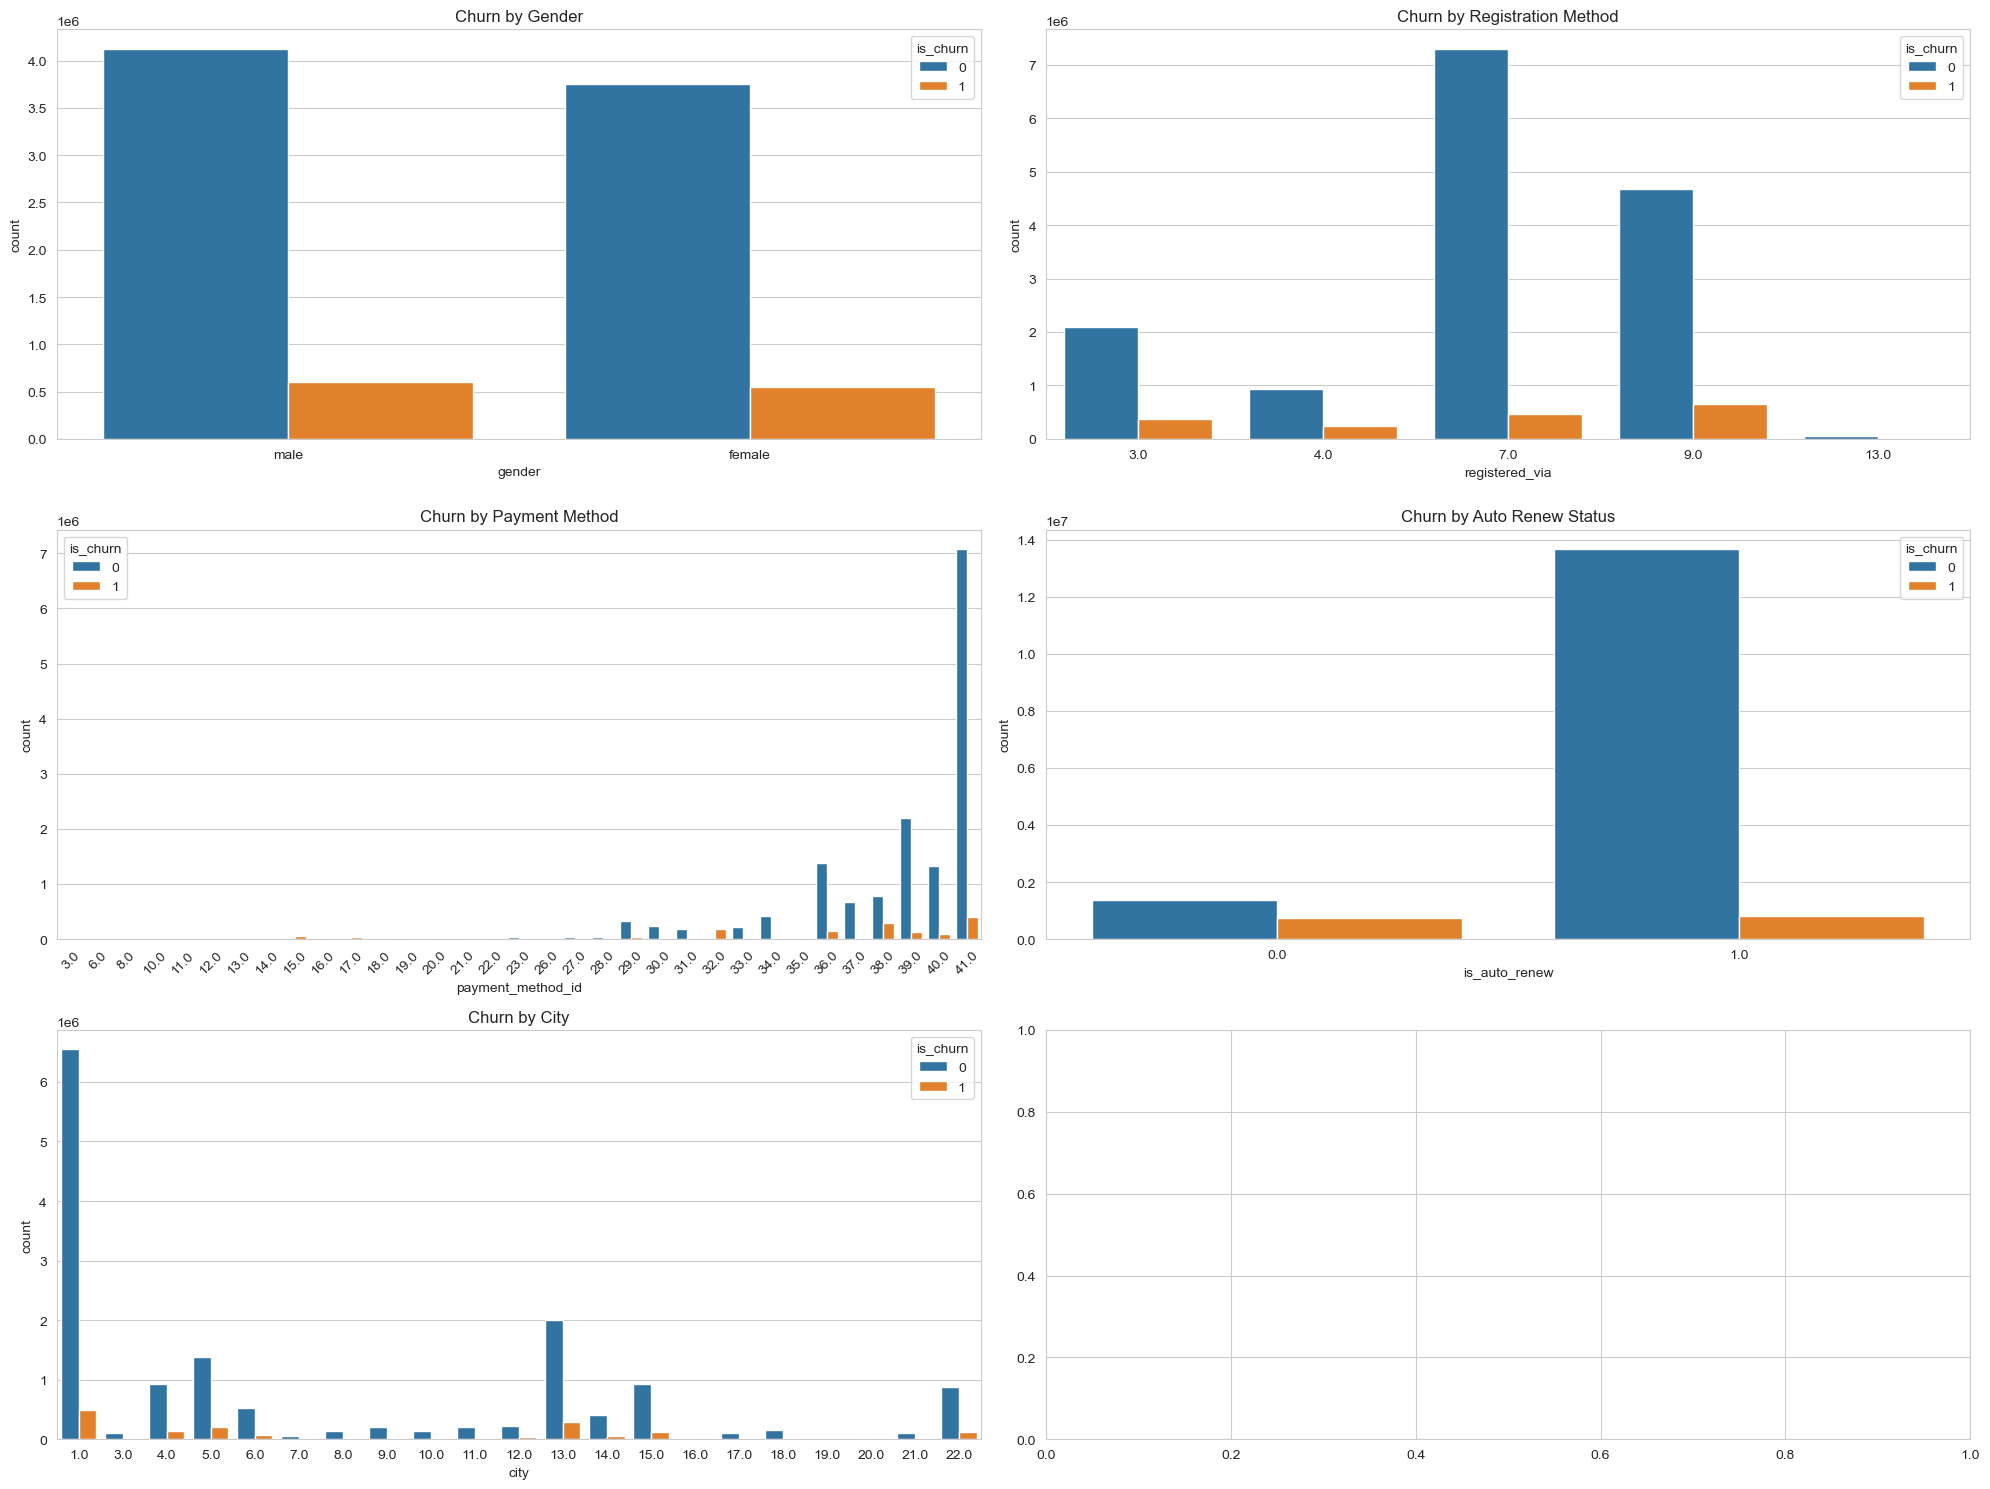

In [35]:
# Visualizing the relationship between is_churn and other features

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Plotting for gender
sns.countplot(data=df_train_merged, x='gender', hue='is_churn', ax=axes[0, 0])
axes[0, 0].set_title('Churn by Gender')

# Plotting for registered_via
sns.countplot(data=df_train_merged, x='registered_via', hue='is_churn', ax=axes[0, 1])
axes[0, 1].set_title('Churn by Registration Method')

# Plotting for payment_method_id
sns.countplot(data=df_train_merged, x='payment_method_id', hue='is_churn', ax=axes[1, 0])
axes[1, 0].set_title('Churn by Payment Method')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Plotting for is_auto_renew
sns.countplot(data=df_train_merged, x='is_auto_renew', hue='is_churn', ax=axes[1, 1])
axes[1, 1].set_title('Churn by Auto Renew Status')

# Plotting for city
sns.countplot(data=df_train_merged, x='city', hue='is_churn', ax=axes[2, 0])
axes[2, 0].set_title('Churn by City')

plt.tight_layout()
plt.show()

- Churn by Gender: Users with an unknown gender seem to have a higher likelihood of churning. On the other hand, users who are clearly identified as male or female appear to have a lower likelihood of churning.
- Churn by Registration Method: Users registered via method 7 appear to have a higher likelihood of churning compared to other registration methods.
- Churn by Payment Method: Some payment methods have a higher churn rate, while others have a lower rate. Specifically, users with payment method ID 40 seem to have a higher likelihood of churning.
- Churn by Auto-Renewal Status: Users with auto-renewal turned off have a higher likelihood of churning. This was also confirmed in the earlier correlation matrix.
- Churn by City: Users from certain cities have a higher likelihood of churning compared to other cities. Notably, users from cities 1 and 5 stand out.

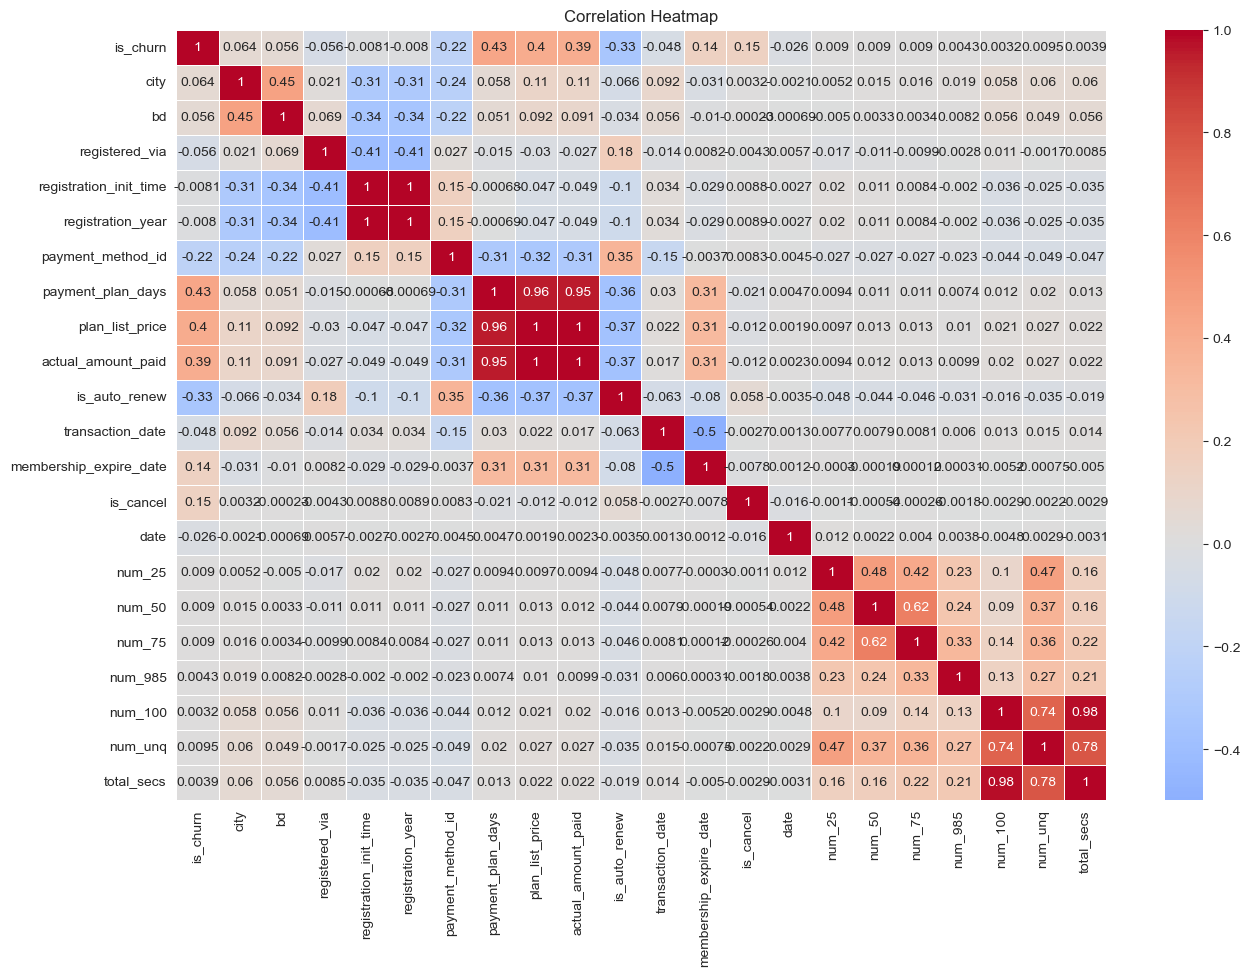

In [36]:
# Removing non-numeric columns
df_numeric = df_train_merged.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
correlation = df_numeric.corr()

# Plotting heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [37]:
# Displaying the correlation dataframe
correlation


,is_churn,city,bd,registered_via,registration_init_time,registration_year,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,...,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
is_churn,1.000000,0.063634,0.055631,-0.055847,-0.008085,-0.008005,-0.216073,0.427057,0.398389,0.394087,...,0.140952,0.147455,-0.025975,0.008964,0.008951,0.008993,0.004295,0.003213,0.009507,0.003886
city,0.063634,1.000000,0.454267,0.021303,-0.305937,-0.305598,-0.244281,0.057779,0.112015,0.110104,...,-0.031282,0.003152,-0.002073,0.005198,0.015079,0.015723,0.018879,0.058156,0.059562,0.060415
bd,0.055631,0.454267,1.000000,0.068522,-0.343043,-0.342676,-0.216979,0.051041,0.091859,0.090719,...,-0.010499,-0.000233,-0.000691,-0.005043,0.003349,0.003374,0.008236,0.056309,0.048711,0.056467
registered_via,-0.055847,0.021303,0.068522,1.000000,-0.405408,-0.405020,0.026942,-0.014596,-0.029547,-0.026754,...,0.008197,-0.004263,0.005655,-0.016578,-0.011152,-0.009917,-0.002755,0.011394,-0.001743,0.008493
registration_init_time,-0.008085,-0.305937,-0.343043,-0.405408,1.000000,0.999929,0.153586,-0.000677,-0.047339,-0.048705,...,-0.029160,0.008832,-0.002740,0.020364,0.011423,0.008435,-0.002033,-0.036291,-0.024992,-0.035277
registration_year,-0.008005,-0.305598,-0.342676,-0.405020,0.999929,1.000000,0.153447,-0.000688,-0.047315,-0.048676,...,-0.028824,0.008937,-0.002746,0.020352,0.011436,0.008441,-0.002033,-0.036256,-0.024987,-0.035245
payment_method_id,-0.216073,-0.244281,-0.216979,0.026942,0.153586,0.153447,1.000000,-0.308484,-0.316497,-0.306980,...,-0.003682,0.008276,-0.004530,-0.026929,-0.027001,-0.027172,-0.023264,-0.044454,-0.048532,-0.046653
payment_plan_days,0.427057,0.057779,0.051041,-0.014596,-0.000677,-0.000688,-0.308484,1.000000,0.955248,0.953500,...,0.311028,-0.021003,0.004750,0.009376,0.011158,0.011192,0.007365,0.012227,0.019507,0.013337
plan_list_price,0.398389,0.112015,0.091859,-0.029547,-0.047339,-0.047315,-0.316497,0.955248,1.000000,0.997081,...,0.311395,-0.012180,0.001879,0.009740,0.012517,0.013384,0.010292,0.020617,0.027318,0.022265
actual_amount_paid,0.394087,0.110104,0.090719,-0.026754,-0.048705,-0.048676,-0.306980,0.953500,0.997081,1.000000,...,0.312641,-0.011633,0.002278,0.009357,0.012374,0.013239,0.009937,0.020243,0.026936,0.021824


/var/folders/mk/zf5k65ss175fm6xc2j79vms00000gn/T/ipykernel_30236/4223160775.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_is_churn = df_train_merged.corr()[['is_churn']].sort_values(by='is_churn', ascending=False)


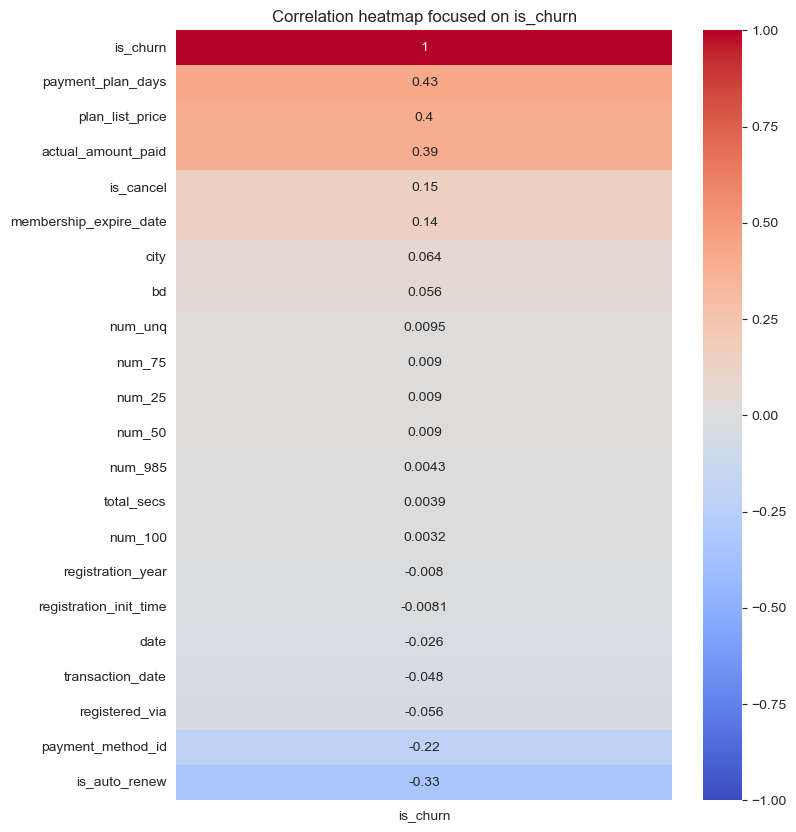

In [38]:
# Creating a correlation heatmap focused on the 'is_churn' variable
correlation_with_is_churn = df_train_merged.corr()[['is_churn']].sort_values(by='is_churn', ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_is_churn, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation heatmap focused on is_churn')
plt.show()
